<h1 style="color:rgb(0,120,170)">K-nearest neighbors</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Visualization</h2>

Visualize the data stored in `DataSet1.csv` with a scatter plot.<br>
The first two columns are the features which hold the x and y coordinates of the data.<br>
The last column provides the labels of the data. Use different colors for different labels.<br>
Always label the axes of all your plots.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'feature y')

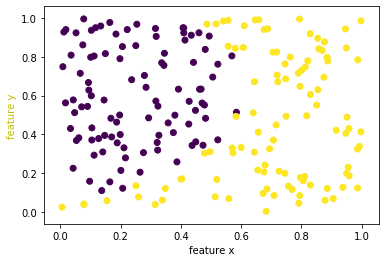

In [25]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('feature x', color = 'k')
plt.ylabel('feature y', color = "y")

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

- Which of the following statements about $k$-nearest neighbors is correct? Tick the correct box (put an "X" in the box):

\[ \]  requires long training time <br>
\[X]  not suited for large datasets <br>
\[X]  sensitive to the rescaling of individual features <br>
\[ \]  has many trainable model parameters <br>

<h2 style="color:rgb(0,120,170)">Task 2: Training the model</h2>

Use $k$-nearest neighbors classifiers with $k \in \{1,3,5,...,177,179\}$.<br>
Either use the `KNeighborsClassifier` function from `sklearn` or implement it on your own.<br>
Estimate the generalization error with zero-one loss via the empirical risk (see lecture Unit 1, p.25 ff.) and use 10-fold
cross validation.<br>
Visualize your results, i.e., plot the error (as defined above) vs. $k$ of $k$-nearest neighbors classifiers.
<br>
<br>
Hint: implement a function that takes the feature matrix ($X$), the label vector ($y$), the number of CV folds ($nf$), $k$ of the $k$-nearest neighbors classifiers ($k$) as arguments:<br>
`def evaluate_kNN(X,y,nf,k):`<br>
It should return the mean error (as defined above) over the CV folds.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

Text(0, 0.5, 'Mean Error')

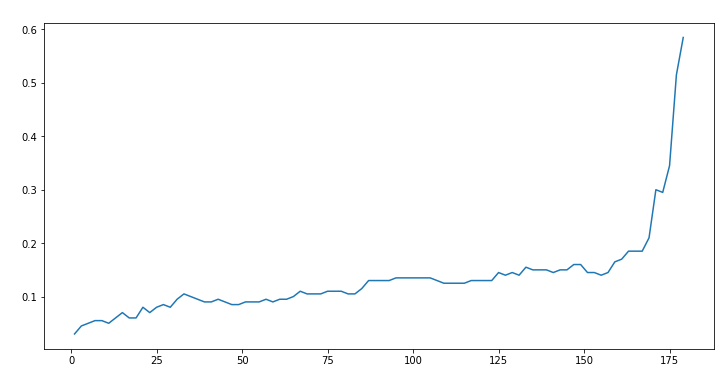

In [26]:
#method for kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import neighbors

# your code here:

def evaluate_kNN(X,y,nf,k): # return the mean error over the CV folds
    error = list()
    kf = KFold(n_splits=nf)
    classifier_knn = KNeighborsClassifier(n_neighbors=k)

    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier_knn.fit(X_train, y_train)
        prediction = classifier_knn.predict(X_test)
        # error.append(classifier_knn.score(X_test, y_test))
        error.append(np.mean(prediction != y_test)) # zero-one loss
    
    mean_error = np.mean(error)
    return mean_error

# print(evaluate_kNN(X,y,10,1))

k_value_errors = []

for i in range(1, 180,2):
    k_value_errors.append(evaluate_kNN(X,y,10,i))

plt.figure(figsize=(12,6))
plt.plot(range(1,180,2),(k_value_errors))
plt.title('Error Rate K Value', color = "w")
plt.xlabel('K Value',color="w")
plt.ylabel('Mean Error',color="w")

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

* Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ gives complex models? Why?
<h3 style="color:rgb(210,90,80)">Answers: </h3>
When K value is small i.e. K=1, The model complexity is high ( Over-fitting or High Variance). 
When K value is very large i.e. K=70, The model complexity decreases ( Under-fitting or High Bias ).
as k increases
– we are averaging over more neighbors
– the effective decision boundary is more “smooth”

Tick the correct box:

\[  \]  Model complexity increases with increasing $k$, as larger $k$ means the model has more parameters. <br>
\[  \]  Model complexity increases with increasing $k$, as larger $k$ means that more neighbors influence the decision. <br>
\[  X]  Model complexity increases with decreasing $k$, as smaller $k$ means that fewer neighbors influence the decision. <br>
\[  ]  Model complexity increases with decreasing $k$, as smaller $k$ means the model has fewer parameters. <br>

* For the data above, how does the error develop with the model complexity? Why? Look again at the data - do the labels appear to be noisy?

Tick the correct box:

\[  X]  The error increases with increasing $k$, as there is hardly any noise in the data <br>
\[  ]  The error increases with increasing $k$, as there is a lot of noise in the data <br>
\[  \]  The error increases with decreasing $k$, as there is hardly any noise in the data <br>
\[  \]  The error increases with decreasing $k$, as there is a lot of noise in the data <br>

<h2 style="color:rgb(0,120,170)">Task 3: Add noise to labels</h2>

Flip the sign of the labels of the data randomly with probability of $\frac{1}{5}$. Use the random seed given below. Perform the same steps as before, i.e. plot the data and plot the error (estimated via the empirical risk) vs. $k$ for 10-fold cross validation.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

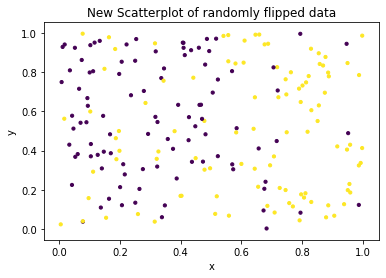

Text(0, 0.5, 'Mean Error')

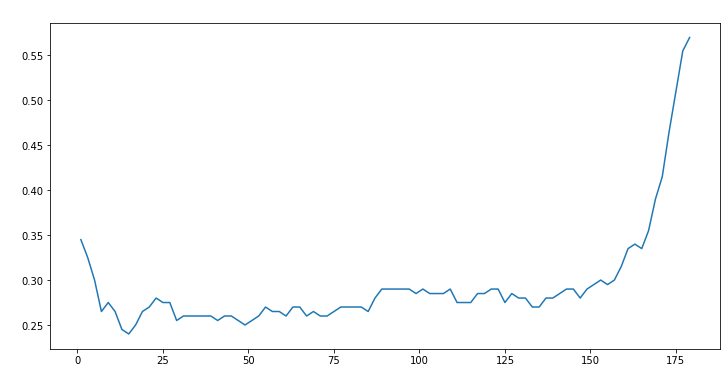

In [27]:
#flip labels of data
np.random.seed(1234)
y_noise = y.copy()

for i in range(len(y_noise)):
    if np.random.randint(1,6) == 5:
        y_noise[i] = -1 * y_noise[i]

plt.scatter(X[:, 0], X[:, 1], s=10, c=y_noise)
plt.title("New Scatterplot of randomly flipped data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

k_value_errors = []

for i in range(1, 180,2):
    k_value_errors.append(evaluate_kNN(X,y_noise,10,i))

plt.figure(figsize=(12,6))
plt.plot(range(1,180,2),(k_value_errors))
plt.title('Error Rate K Value', color = "w")
plt.xlabel('K Value',color="w")
plt.ylabel('Mean Error',color="w")

<h3 style="color:rgb(210,90,80)">Question (10 points)</h3>

* Which differences do you observe?
* Which conclusions do you draw from that?

Tick the correct boxes:

\[  \]  The two classes are still well seperable and have nearly no overlap <br>
\[  \]  The two classes are now less seperable and have a larger overlap  <br>

\[  X]  Random label flipping brings noise into the data <br>
\[  \]  Random label flipping simply swaps data, but no significant changes <br>

\[  ]  Very small values of $k$ correspond to too low model complexity (underfitting) <br>
\[  X]  Very small values of $k$ correspond to too high model complexity (overfitting) <br>
\[X\]  Very large values of $k$ correspond to too low model complexity (underfitting) <br>
\[  ]  Very large values of $k$ correspond to too high model complexity (overfitting) <br>
\[  \]  Overall, the error remains nearly unchanged compared to the original data set. <br>
\[  \]  Overall, the error increases compared to the original data set. <br>

<h2 style="color:rgb(0,120,170)">Task 4: $k$-NN in higher dimensions</h2>

Going back to unflipped labels, add $f$ = 1,2,3,4 random features to the data matrix $X$ which are uniformly distributed between 0 an 1.
Again, plot the error versus $k$ for 10 folds. Plot mean error versus $f$ for $k$ = 11.

<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [28]:
#create a data frame with 1,2,3,4 additional columns
np.random.seed(1234)

Z = np.genfromtxt('DataSet1.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

# create copy to work on
X_new = X.copy() # shape(200,2)

# create matrix (200, 4) with random uniform values
r_feature = np.random.uniform(low=0, high=1, size=(len(X_new),4)) # shape (200,4)

X_list = []
for i in range(1, 5):
    f_i = np.array(r_feature[:,:i])
    X_f = np.concatenate((X_new, f_i), axis=1)
    X_list.append(X_f)

In [29]:
k_neighbours = np.array(range(1,180,2))

# return a list of errors for different datasets
list_errors = list()

for X in X_list:
    error = list()
    for k in k_neighbours:
        mean_error = evaluate_kNN(X, y, 10, k)
        error.append(mean_error)
    list_errors.append(error)

In [11]:
print(type(list_errors[0]))

<class 'list'>


Text(0, 0.5, 'Mean Error')

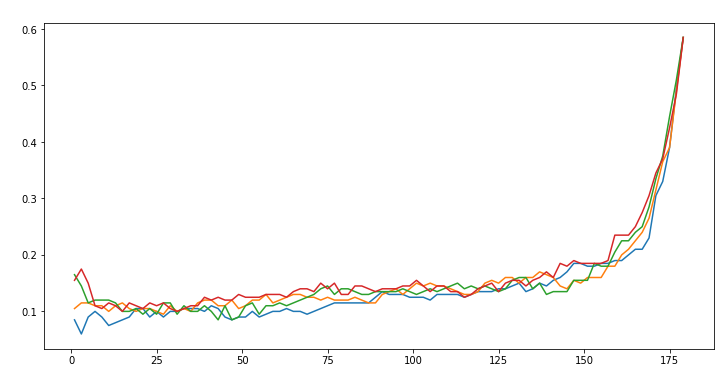

In [30]:
# def plt_errors(list_errors:list):
#     plt.figure=(12,6)
#     cmap=["m","orange","c","b"]
#     for index in range(len(list_errors)):
#         list_error = list_errors[index]
#         plt.plot(range(1,180,2), list_error, color=cmap[index], label="", alpha=0.15)
# HATE MY LIFE

plt.figure(figsize=(12,6))
plt.plot(range(1,180,2), list_errors[0])
plt.plot(range(1,180,2), list_errors[1])
plt.plot(range(1,180,2), list_errors[2])
plt.plot(range(1,180,2), list_errors[3])
plt.title('Error Rate K Value', color = "w")
plt.xlabel('K Value',color="w")
plt.ylabel('Mean Error',color="w")

In [31]:
errors_k11 = []

for X in X_list:
    mean_error = evaluate_kNN(X, y, 10, 11)
    errors_k11.append(mean_error)

Text(0, 0.5, 'error rate')

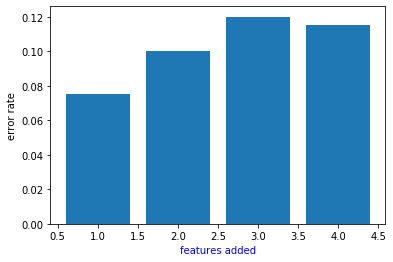

In [32]:
plt.bar(range(1,5), errors_k11)
plt.xlabel('features added', color="b")
plt.ylabel('error rate')

<h3 style="color:rgb(210,90,80)">Question (5 points)</h3>

* Try to explain possible changes of the error.

Tick the correct boxex:

\[  \]  $k$-nearest neighbors is robust aginst randomly added further features; noise is filtered out <br>
\[  X]  $k$-nearest neighbors is not robust aginst randomly added further features; noise is not filtered out

\[  X]  The more noise (extra dimensions), the lower the optimal $k$ <br>
\[  \]  The more noise (extra dimensions), the higher the optimal $k$ <br>